In [1]:
import pandas as pd
import glob
import os 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns



Matplotlib created a temporary config/cache directory at /scratch/slurm-job.3803994/matplotlib-cbb7ivvh because the default path (/cluster/customapps/biomed/grlab/users/prelotla/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# TODO REFACTOR IN FUNCTIONS

In [3]:
def barplot_3_lines(tmp_plot, col1, col2, col3, x_var, sample_type, save_suffix, base_plot, save):
    plt.figure(figsize = (20, 6))#set the width of the bars
    plt.grid()
    font_labels = 12
    pos_text_y = 6
    lw = 2
    ms = 6
    # plot bars in stack manner
    ax1 = plt.plot(np.arange(len(tmp_plot[x_var])), tmp_plot[col1], markersize = ms,
                  color='r', marker= 's', linewidth=lw, label = col1, alpha=0.7)
    ax2 = plt.plot(np.arange(len(tmp_plot[x_var])), tmp_plot[col2], markersize = ms,
                  color='g',  marker= 'v', linewidth=lw, label = col2, alpha=0.7)
    ax3 = plt.plot(np.arange(len(tmp_plot[x_var])), tmp_plot[col3], markersize = ms,
                  color='b', marker= 'o', linewidth=lw, label = col3, alpha=0.7)
    
    plt.xticks(rotation=90, ticks=np.arange(len(tmp_plot[x_var])),
               labels=tmp_plot[x_var],  fontsize=font_labels + 2 ) 
    
    plt.yticks(fontsize=font_labels + 2) 
    plt.legend(loc='upper left', fontsize=font_labels)  #,  bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#     for r1, r2, r3 in zip(ax1, ax2, ax3):
#         h1 = r1.get_height()
#         h2 = r2.get_height()
#         h3 = r3.get_height()
#         upset = 0.7
#         plt.text(r1.get_x() + r1.get_width() / 2., h1 + upset , "%d" % h1, 
#                  ha="center", va="bottom", color="black", fontsize=font_labels)
#         plt.text(r2.get_x() + r2.get_width() / 2., h2 + upset , "%d" % h2 , 
#                  ha="center", va="bottom", color="black", fontsize=font_labels)
#         plt.text(r3.get_x() + r3.get_width() / 2., h3 + upset , "%d" % h3, 
#                  ha="center", va="bottom", color="black", fontsize=font_labels)
    plt.title(sample_type, fontsize=font_labels + 2)
    plt.ylabel('Number of unique SNS validated peptide', fontsize=font_labels + 3)
    name = f'Compare_SNSmethods_{sample_type}_{save_suffix}'
    save_path = os.path.join(base_plot, f'{name}.pdf')
    print(save_path)
    if save:
        print("save to {}".format(save_path))
        plt.savefig(save_path, bbox_inches='tight')
    plt.show() # write function

In [4]:
def barplot_3_bars(tmp_plot, col1, col2, col3, x_var, sample_type, save_suffix, base_plot, save):

    plt.figure(figsize = (20, 6))#set the width of the bars
    font_labels = 12
    pos_text_y = 6
    w = 0.2
    # plot bars in stack manner
    ax1 = plt.bar(np.arange(len(tmp_plot[x_var])), tmp_plot[col1], width=w,
                  color='darkkhaki', edgecolor= 'k', linewidth=0.7, label = col1)
    ax2 = plt.bar(np.arange(len(tmp_plot[x_var])) + 0.2, tmp_plot[col2], width=w,
                  color='orange',  edgecolor= 'k', linewidth=0.7, label = col2)
    ax3 = plt.bar(np.arange(len(tmp_plot[x_var])) + 0.4, tmp_plot[col3], width=w,
                  color='lightblue', edgecolor= 'k', linewidth=0.7, label = col3)
    plt.xticks(rotation=90, ticks=np.arange(len(tmp_plot[x_var])) + 0.3,
               labels=tmp_plot[x_var],  fontsize=font_labels + 2 ) 
    plt.yticks(fontsize=font_labels + 2) 
    plt.legend(loc='upper left', fontsize=font_labels)  #,  bbox_to_anchor=(0.5, 0., 0.5, 0.5))
    for r1, r2, r3 in zip(ax1, ax2, ax3):
        h1 = r1.get_height()
        h2 = r2.get_height()
        h3 = r3.get_height()
        upset = 0.7
        plt.text(r1.get_x() + r1.get_width() / 2., h1 + upset , "%d" % h1, 
                 ha="center", va="bottom", color="black", fontsize=font_labels)
        plt.text(r2.get_x() + r2.get_width() / 2., h2 + upset , "%d" % h2 , 
                 ha="center", va="bottom", color="black", fontsize=font_labels)
        plt.text(r3.get_x() + r3.get_width() / 2., h3 + upset , "%d" % h3, 
                 ha="center", va="bottom", color="black", fontsize=font_labels)

    plt.ylabel('Number of unique kmer candidates', fontsize=font_labels + 3)
    name = f'Filtering_2pipelines_kmers_{sample_type}_{save_suffix}'
    save_path = os.path.join(base_plot, f'{name}.pdf')
    if save:
        print("save to {}".format(save_path))
        plt.savefig(save_path, bbox_inches='tight')
    plt.show() # write function

In [5]:
def reader_assign_conf(path, FDR_threshold):
    print(f'Reading {path}')
    df = pd.read_csv(path, sep = '\t')
    print(f'With Shape: {df.shape[0]}')
    assert('delta_cn' in df.columns)
    df_filtered = df.loc[df['tdc q-value'] < FDR_threshold]
    print(f'Number of validated psm: {df_filtered.shape}')
    val = len(set(df_filtered['unmodified sequence']))
    val_rate = val / len(set(df['unmodified sequence']))
    print(f'Number of validated unique peptides: {val}')
    print(f'Validation Rate: {np.round(val_rate * 100 , 2)} percent')
    return val, val_rate, df_filtered

In [6]:
# INPUTS 
basedir = '/cluster/work/grlab/projects/projects2020_OHSU/proteomics'
pipelines = ['OHSU', 'ETH']
samples = ['TCGA-C8-A12P-01A-11R-A115-07',
          'TCGA-AO-A0JM-01A-21R-A056-07',
          'TCGA-BH-A18V-01A-11R-A12D-07',
          'TCGA-A2-A0D2-01A-21R-A034-07',
          'TCGA-A2-A0SX-01A-12R-A084-07', 
          'TCGA-25-1319-01A-01R-1565-13',
          'TCGA-25-1313-01A-01R-1565-13',
          'TCGA-61-2008-01A-02R-1568-13',
          'TCGA-24-1431-01A-01R-1566-13',
          'TCGA-24-2298-01A-01R-1569-13']
samples = samples[-2:-1]
print(samples)
FDR_limit = 0.05

['TCGA-24-1431-01A-01R-1566-13']


# Parse: results for all experiments

In [7]:
results = {'sample':[], 'experiment': [], 'pipeline': [],
           '#peptides_FDR_single': [], '#peptides_FDR_poolExp': [],  '#peptides_FDR_poolExp_unionPipelines': [], 
          'valRate_FDR_single': [], 'valRate_FDR_poolExp': [],  'valRate_FDR_poolExp_unionPipelines': []}


for sample in samples:
    sample = '-'.join(sample.split('-')[0:3])
    for pipeline in pipelines:
        path_single = os.path.join(basedir, pipeline, sample, 'assign_conf_per_experiment')
        path_pool_pipeline = os.path.join(basedir, pipeline, sample, 'assign_conf_pooled_FDR')
        path_pool_union = os.path.join(basedir, f'assign_conf_joint_to_{pipeline}', sample)
        path_test_OHSU = os.path.join(basedir, 'OHSU', sample, 'assign_conf_per_experiment')
        path_test_ETH = os.path.join(basedir, 'ETH', sample, 'assign_conf_per_experiment')
        experiment_list = [ i.split('/')[-1] for i in glob.glob(path_single + '/*')]

        for experiment in experiment_list:
            if pipeline == 'OHSU':
                original_name = experiment
                cut_name = experiment[1:]
            else:
                original_name = experiment
                cut_name = experiment
               
            if os.path.isfile(os.path.join(path_test_OHSU, 'J' + cut_name, 'assign-confidence.target.txt')) and \
                os.path.isfile(os.path.join(path_test_ETH, cut_name, 'assign-confidence.target.txt')): 
                results['pipeline'].append(pipeline)
                results['sample'].append(sample)
                results['experiment'].append(cut_name) 
                
                # search 1 experiment, 1 pipeline  
                df_single = os.path.join(path_single, original_name, 'assign-confidence.target.txt')
                val, val_rate, _ = reader_assign_conf(df_single, FDR_limit)
                results['#peptides_FDR_single'].append(val)
                results['valRate_FDR_single'].append(val_rate)

                # search all experiments, 1 pipeline
                df_pool_pipeline = os.path.join(path_pool_pipeline, f'tsearch-{original_name}.txt')
                val, val_rate, _ = reader_assign_conf(df_pool_pipeline, FDR_limit)
                results['#peptides_FDR_poolExp'].append(val)
                results['valRate_FDR_poolExp'].append(val_rate)

                # search all experiments, 1 union of pipelines
                df_pool_union = os.path.join(path_pool_union, f'tsearch-{original_name}.txt')
                val, val_rate, _ = reader_assign_conf(df_pool_union, FDR_limit)
                results[ '#peptides_FDR_poolExp_unionPipelines'].append(val)
                results['valRate_FDR_poolExp_unionPipelines'].append(val_rate)

                print('\n')


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-1431/assign_conf_per_experiment/J0A53XGA/assign-confidence.target.txt
With Shape: 304950
Number of validated psm: (906, 17)
Number of validated unique peptides: 265
Validation Rate: 3.26 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-1431/assign_conf_pooled_FDR/tsearch-J0A53XGA.txt
With Shape: 37136
Number of validated psm: (871, 18)
Number of validated unique peptides: 249
Validation Rate: 4.05 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-24-1431/tsearch-J0A53XGA.txt
With Shape: 35782
Number of validated psm: (876, 18)
Number of validated unique peptides: 251
Validation Rate: 4.1 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-1431/assign_conf_per_experiment/J0A13AGA/assign-confidence.target.txt
With Shape: 530716
Number of validated psm: (1230, 17)
Number of validated

With Shape: 25067
Number of validated psm: (632, 18)
Number of validated unique peptides: 177
Validation Rate: 4.11 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-1431/assign_conf_per_experiment/J0AN12GA/assign-confidence.target.txt
With Shape: 659115
Number of validated psm: (1089, 17)
Number of validated unique peptides: 402
Validation Rate: 2.27 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-1431/assign_conf_pooled_FDR/tsearch-J0AN12GA.txt
With Shape: 77966
Number of validated psm: (1020, 18)
Number of validated unique peptides: 362
Validation Rate: 2.73 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-24-1431/tsearch-J0AN12GA.txt
With Shape: 75051
Number of validated psm: (1026, 18)
Number of validated unique peptides: 366
Validation Rate: 2.79 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-1431/assign_co

Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-1431/assign_conf_per_experiment/J0A13XGA/assign-confidence.target.txt
With Shape: 521211
Number of validated psm: (1204, 17)
Number of validated unique peptides: 382
Validation Rate: 2.71 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-1431/assign_conf_pooled_FDR/tsearch-J0A13XGA.txt
With Shape: 62690
Number of validated psm: (1145, 18)
Number of validated unique peptides: 353
Validation Rate: 3.35 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-24-1431/tsearch-J0A13XGA.txt
With Shape: 60296
Number of validated psm: (1150, 18)
Number of validated unique peptides: 355
Validation Rate: 3.4 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-1431/assign_conf_per_experiment/J0253AGA/assign-confidence.target.txt
With Shape: 106585
Number of validated psm: (330, 17)
Number of validat

With Shape: 20818
Number of validated psm: (446, 18)
Number of validated unique peptides: 129
Validation Rate: 3.67 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-1431/assign_conf_per_experiment/J0211XGA/assign-confidence.target.txt
With Shape: 150408
Number of validated psm: (375, 17)
Number of validated unique peptides: 111
Validation Rate: 2.8 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-1431/assign_conf_pooled_FDR/tsearch-J0211XGA.txt
With Shape: 18144
Number of validated psm: (361, 18)
Number of validated unique peptides: 103
Validation Rate: 3.43 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_OHSU/TCGA-24-1431/tsearch-J0211XGA.txt
With Shape: 17569
Number of validated psm: (363, 18)
Number of validated unique peptides: 105
Validation Rate: 3.52 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-24-1431/assign_conf_p

With Shape: 7804
Number of validated psm: (184, 18)
Number of validated unique peptides: 43
Validation Rate: 3.3 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_per_experiment/0A11AGA/assign-confidence.target.txt
With Shape: 82773
Number of validated psm: (230, 17)
Number of validated unique peptides: 60
Validation Rate: 2.82 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_pooled_FDR/tsearch-0A11AGA.txt
With Shape: 45022
Number of validated psm: (198, 18)
Number of validated unique peptides: 47
Validation Rate: 2.42 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-24-1431/tsearch-0A11AGA.txt
With Shape: 9406
Number of validated psm: (197, 18)
Number of validated unique peptides: 48
Validation Rate: 3.07 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_per_experiment/

With Shape: 106352
Number of validated psm: (261, 17)
Number of validated unique peptides: 71
Validation Rate: 2.62 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_pooled_FDR/tsearch-0213AGA.txt
With Shape: 57430
Number of validated psm: (246, 18)
Number of validated unique peptides: 64
Validation Rate: 2.55 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-24-1431/tsearch-0213AGA.txt
With Shape: 12151
Number of validated psm: (252, 18)
Number of validated unique peptides: 66
Validation Rate: 3.26 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_per_experiment/0A13XGA/assign-confidence.target.txt
With Shape: 119364
Number of validated psm: (306, 17)
Number of validated unique peptides: 77
Validation Rate: 2.52 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_pooled_FDR/t

With Shape: 38626
Number of validated psm: (89, 17)
Number of validated unique peptides: 26
Validation Rate: 2.62 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_pooled_FDR/tsearch-0251AGA.txt
With Shape: 21696
Number of validated psm: (84, 18)
Number of validated unique peptides: 23
Validation Rate: 2.53 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/assign_conf_joint_to_ETH/TCGA-24-1431/tsearch-0251AGA.txt
With Shape: 4710
Number of validated psm: (81, 18)
Number of validated unique peptides: 23
Validation Rate: 3.05 percent


Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_per_experiment/0A51AGA/assign-confidence.target.txt
With Shape: 71888
Number of validated psm: (216, 17)
Number of validated unique peptides: 56
Validation Rate: 3.05 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-24-1431/assign_conf_pooled_FDR/tsearch

# Plot: Results per experiment

Compare_SNSmethods_TCGA-24-1431_OHSU_FDR5%.pdf


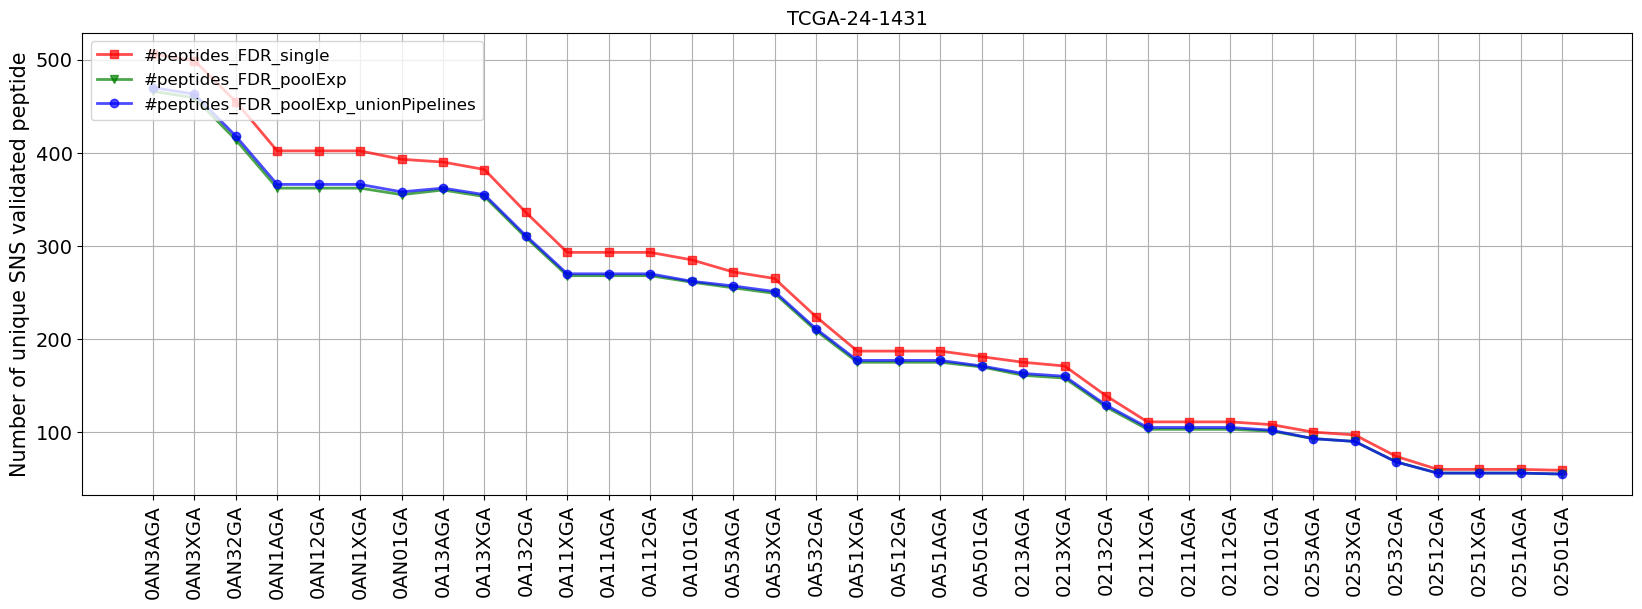

Compare_SNSmethods_TCGA-24-1431_ETH_FDR5%.pdf


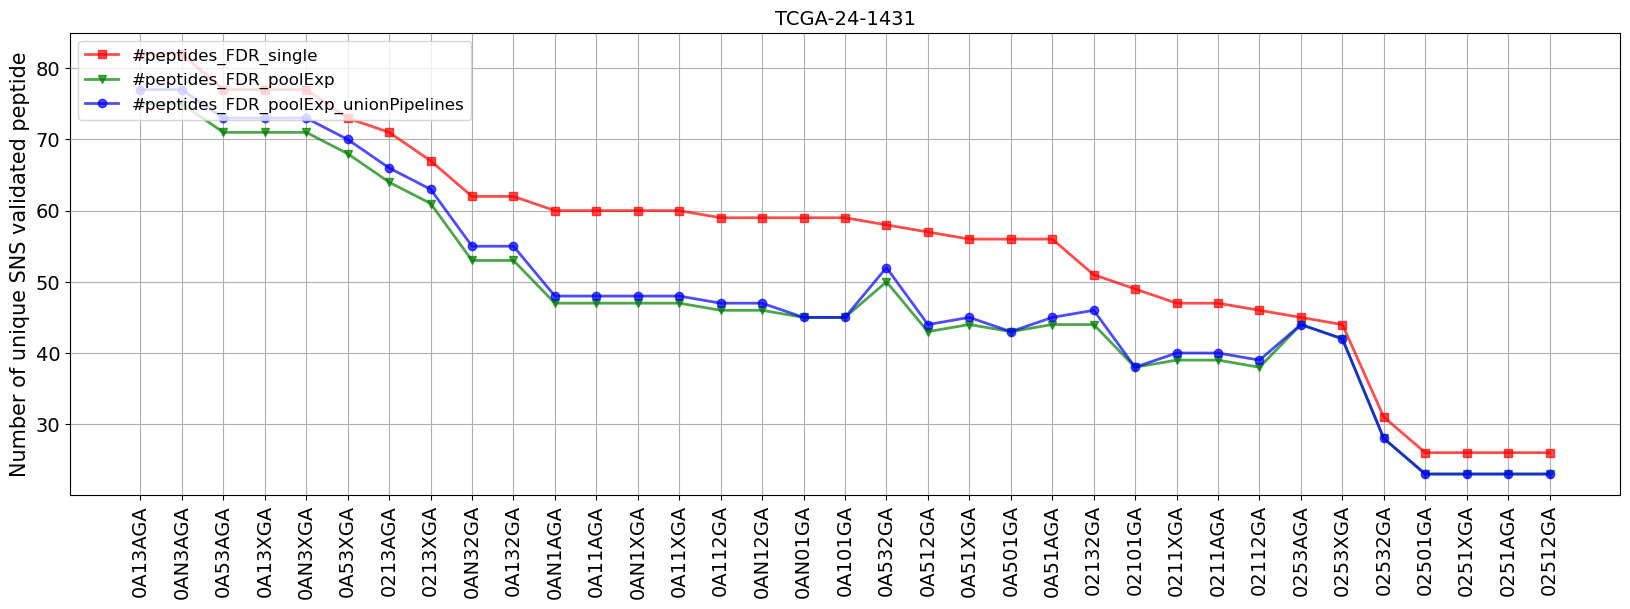

In [8]:
for sample in samples:
    sample = '-'.join(sample.split('-')[0:3])
    for pipeline in pipelines:
        df_plot = pd.DataFrame(results)

        df_plot = df_plot.loc[df_plot['pipeline'] == pipeline]
        df_plot = df_plot.sort_values('#peptides_FDR_single', ascending=False)
        barplot_3_lines(df_plot, 
               col1='#peptides_FDR_single', 
               col2='#peptides_FDR_poolExp', 
               col3='#peptides_FDR_poolExp_unionPipelines', 
               x_var='experiment', 
               sample_type=sample, 
               save_suffix=f'{pipeline}_FDR{int(FDR_limit*100)}%', 
               base_plot='', 
               save=False)

In [9]:
# TODO what about OHSU experiments which are not shared?

# Parse: Intermediate step

In [63]:
# INPUTS
samples = ['TCGA-C8-A12P-01A-11R-A115-07',
          'TCGA-AO-A0JM-01A-21R-A056-07',
          'TCGA-BH-A18V-01A-11R-A12D-07',
          'TCGA-A2-A0D2-01A-21R-A034-07',
          'TCGA-A2-A0SX-01A-12R-A084-07', 
          'TCGA-25-1319-01A-01R-1565-13',
          'TCGA-25-1313-01A-01R-1565-13',
          'TCGA-61-2008-01A-02R-1568-13',
          'TCGA-24-1431-01A-01R-1566-13',
          'TCGA-24-2298-01A-01R-1569-13']
#samples = samples[-2:]
FDR_Threshold = 0.01

In [69]:
prep_set = {'#number of validated peptides':[], 'pipeline_compared' : [], 'set_type' : [], 'sample':[]}

for sample in samples:
    sample = '-'.join(sample.split('-')[0:3])
    print(sample)

    # Extract 
    OHSU_pool = os.path.join(basedir, f'OHSU/{sample}/tide_search/assign-confidence.target.txt')
    ETH_pool = os.path.join(basedir, f'ETH/{sample}/tide_search/assign-confidence.target.txt')
    join_pool = os.path.join(basedir, f'tide_search_joint/{sample}/assign-confidence.target.txt')
    _, _, OHSU_pool = reader_assign_conf(OHSU_pool, FDR_Threshold)
    _, _, ETH_pool = reader_assign_conf(ETH_pool, FDR_Threshold)
    _, _, join_pool = reader_assign_conf(join_pool, FDR_Threshold)

    # Make Set
    OHSU_pool_peptides = set(OHSU_pool['unmodified sequence'].unique())
    ETH_pool_peptides = set(ETH_pool['unmodified sequence'].unique())
    join_pool_peptides = set(join_pool['unmodified sequence'].unique())

    # Get plotting data 
    print('set sizes')
    val = len(OHSU_pool_peptides)
    prep_set['#number of validated peptides'].append(val)
    prep_set['pipeline_compared'].append('OHSU')
    prep_set['set_type'].append('per pipeline (pooled experiments)')
    prep_set['sample'].append(sample)
    print(val)

    val = len(ETH_pool_peptides)
    prep_set['#number of validated peptides'].append(val)
    prep_set['pipeline_compared'].append('ETH')
    prep_set['set_type'].append('per pipeline (pooled experiments)')
    prep_set['sample'].append(sample)
    print(val)

    val = len(join_pool_peptides)

    print('Shared discoveries ETH, OHSU')
    val = len(join_pool_peptides.intersection(OHSU_pool_peptides))
    prep_set['#number of validated peptides'].append(val)
    prep_set['pipeline_compared'].append('OHSU')
    prep_set['set_type'].append('`union of 2 pipelines` & per pipeline')
    prep_set['sample'].append(sample)
    print(val)


    val = len(join_pool_peptides.intersection(ETH_pool_peptides))
    prep_set['#number of validated peptides'].append(val)
    prep_set['pipeline_compared'].append('ETH')
    prep_set['set_type'].append('`union of 2 pipelines` & per pipeline')
    prep_set['sample'].append(sample)
    print(val)


    print('Missing discoveries from Union')
    val = len(OHSU_pool_peptides.difference(join_pool_peptides))
    prep_set['#number of validated peptides'].append(val)
    prep_set['pipeline_compared'].append('OHSU')
    prep_set['set_type'].append('Loss of peptides in union (per pipeline \ `union of 2 pipelines`)')
    prep_set['sample'].append(sample)
    print(val)

    val = len(ETH_pool_peptides.difference(join_pool_peptides))
    prep_set['#number of validated peptides'].append(val)
    prep_set['pipeline_compared'].append('ETH')
    prep_set['set_type'].append('Loss of peptides in union (per pipeline \ `union of 2 pipelines`)')
    prep_set['sample'].append(sample)
    print(val)



    val = len(OHSU_pool_peptides.intersection(ETH_pool_peptides))
    prep_set['#number of validated peptides'].append(val)
    prep_set['pipeline_compared'].append('ETH and OHSU')
    prep_set['set_type'].append('per pipeline OHSU & per pipeline ETH')
    prep_set['sample'].append(sample)
    print(val)
    val_inter = val
    val_inter_OHSU_ETH = OHSU_pool_peptides.intersection(ETH_pool_peptides)


    print('Additional discoveries running Union')
    val = len(join_pool_peptides.difference(ETH_pool_peptides).difference(OHSU_pool_peptides))
    prep_set['#number of validated peptides'].append(val)
    prep_set['pipeline_compared'].append('OHSU or ETH')
    prep_set['set_type'].append('New finds in union (`union of 2 pipelines` \ ETH per pipeline \ OHSU per pipeline)')
    prep_set['sample'].append(sample)
    print(val)







TCGA-C8-A12P
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-C8-A12P/tide_search/assign-confidence.target.txt
With Shape: 194669
Number of validated psm: (163, 17)
Number of validated unique peptides: 50
Validation Rate: 0.93 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/ETH/TCGA-C8-A12P/tide_search/assign-confidence.target.txt
With Shape: 6633
Number of validated psm: (0, 17)
Number of validated unique peptides: 0
Validation Rate: 0.0 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/tide_search_joint/TCGA-C8-A12P/assign-confidence.target.txt
With Shape: 195618
Number of validated psm: (206, 17)
Number of validated unique peptides: 60
Validation Rate: 1.11 percent
set sizes
50
0
Shared discoveries ETH, OHSU
50
0
Missing discoveries from Union
0
0
0
Additional discoveries running Union
10
TCGA-AO-A0JM
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/OHSU/TCGA-AO-A0JM/tide_search/assign-conf

With Shape: 110198
Number of validated psm: (508, 17)
Number of validated unique peptides: 162
Validation Rate: 1.98 percent
Reading /cluster/work/grlab/projects/projects2020_OHSU/proteomics/tide_search_joint/TCGA-24-2298/assign-confidence.target.txt
With Shape: 132713
Number of validated psm: (2582, 17)
Number of validated unique peptides: 1078
Validation Rate: 2.42 percent
set sizes
1140
162
Shared discoveries ETH, OHSU
1068
159
Missing discoveries from Union
72
3
154
Additional discoveries running Union
2


In [71]:
for k, v in prep_set.items():
    print(k)
    print(len(v))

#number of validated peptides
80
pipeline_compared
80
set_type
80
sample
80


In [72]:


df_plot.head()

,#number of validated peptides,pipeline_compared,set_type,sample
0,50,OHSU,per pipeline (pooled experiments),TCGA-C8-A12P
1,0,ETH,per pipeline (pooled experiments),TCGA-C8-A12P
2,50,OHSU,`union of 2 pipelines` & per pipeline,TCGA-C8-A12P
3,0,ETH,`union of 2 pipelines` & per pipeline,TCGA-C8-A12P
4,0,OHSU,Loss of peptides in union (per pipeline \ `uni...,TCGA-C8-A12P


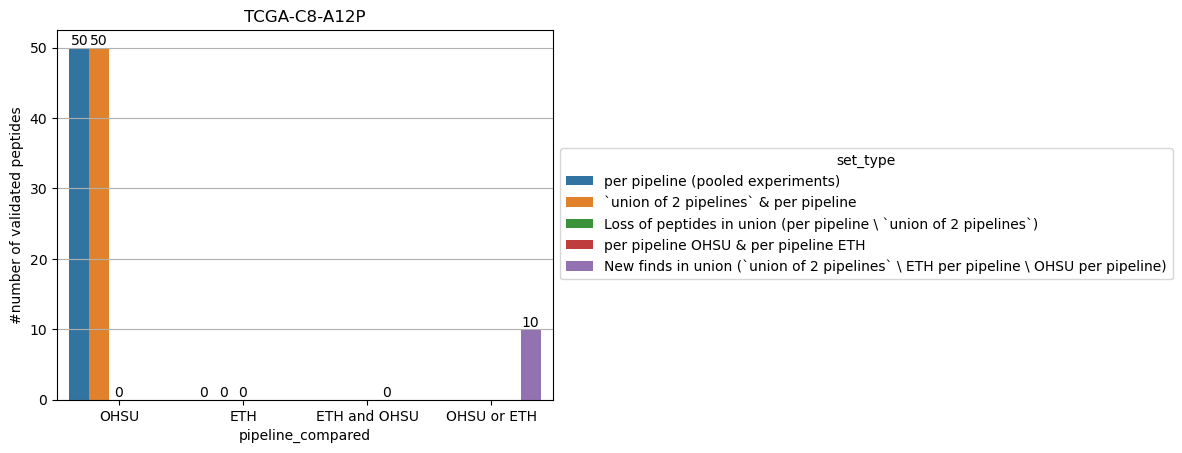

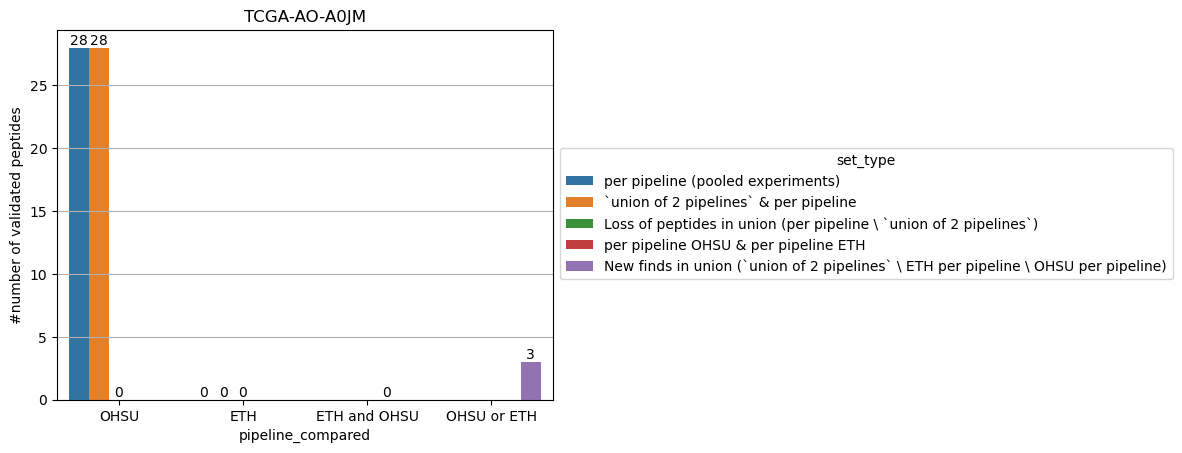

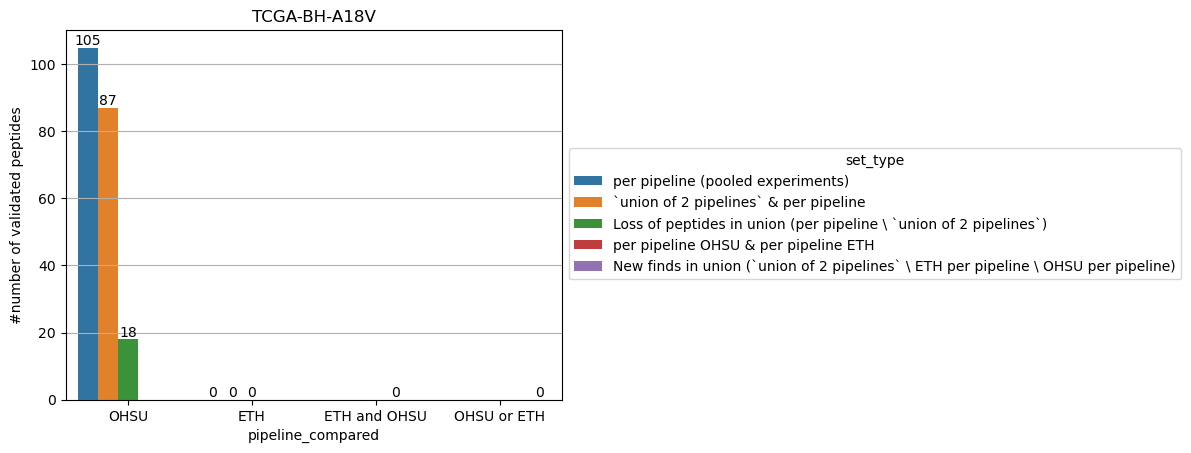

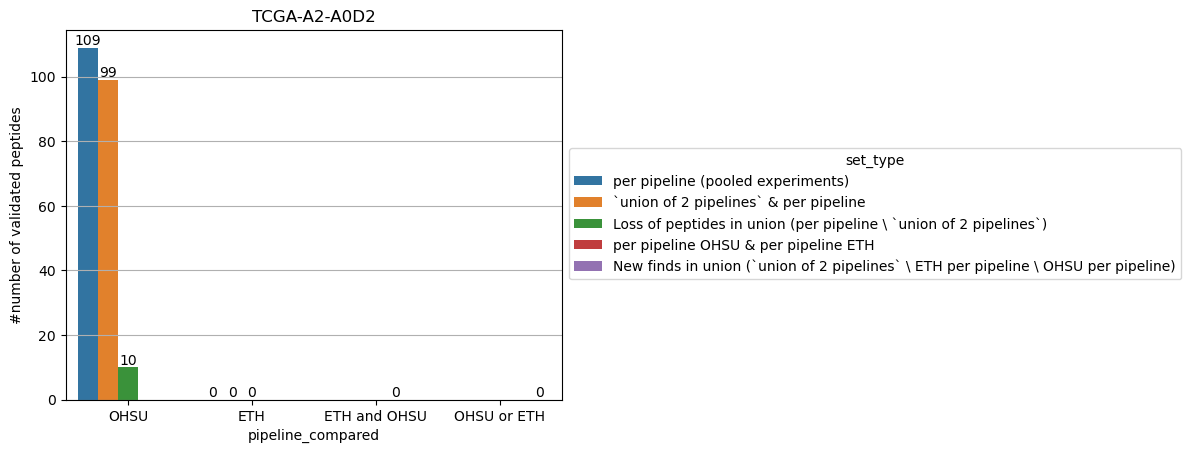

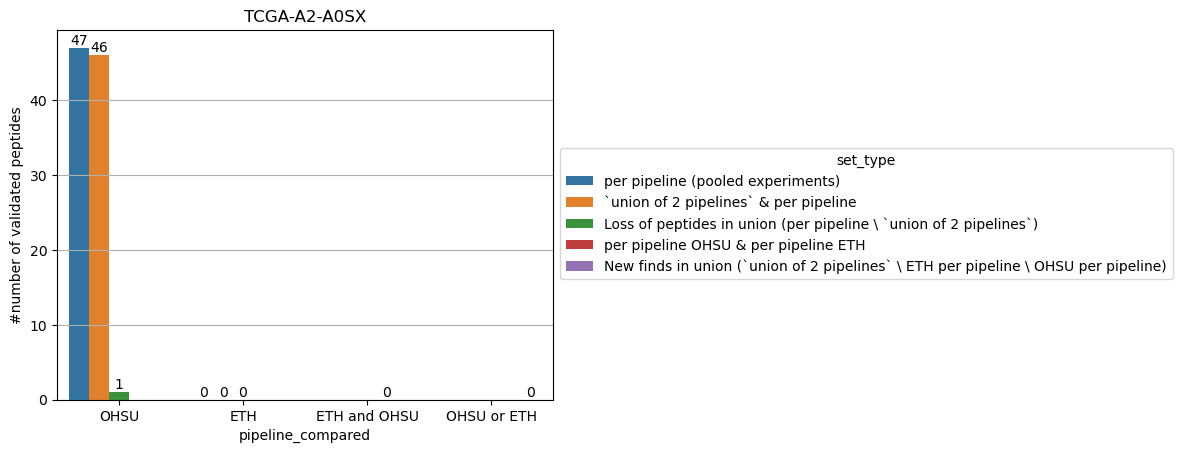

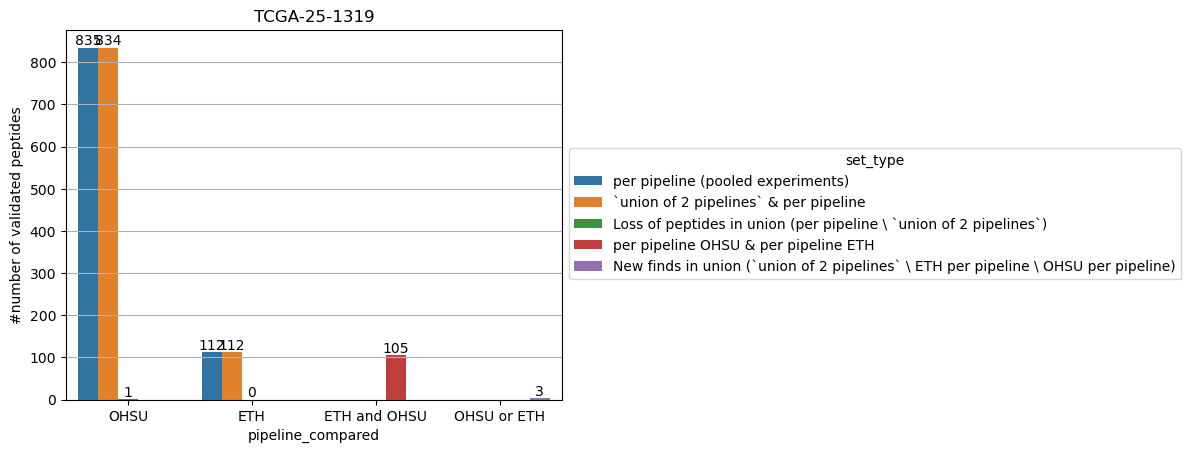

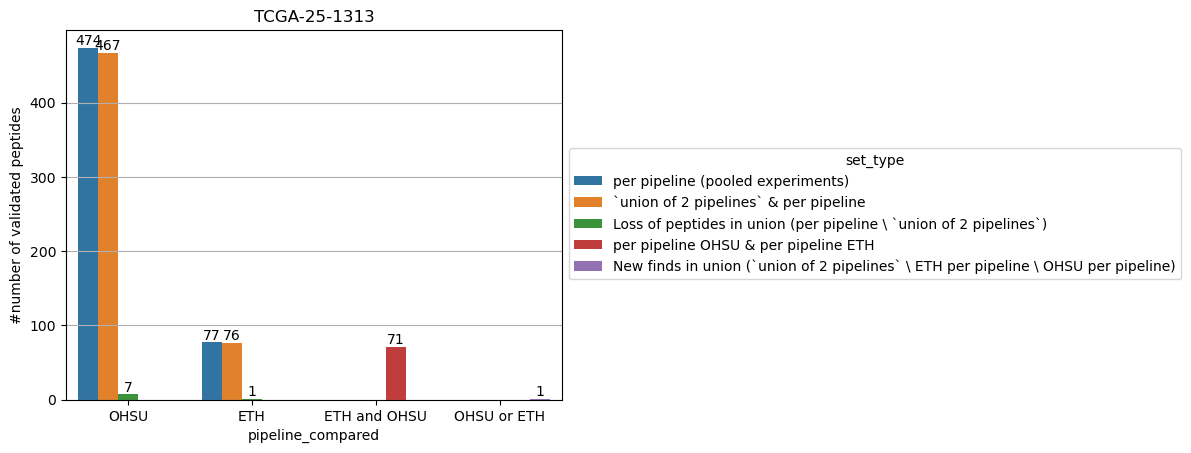

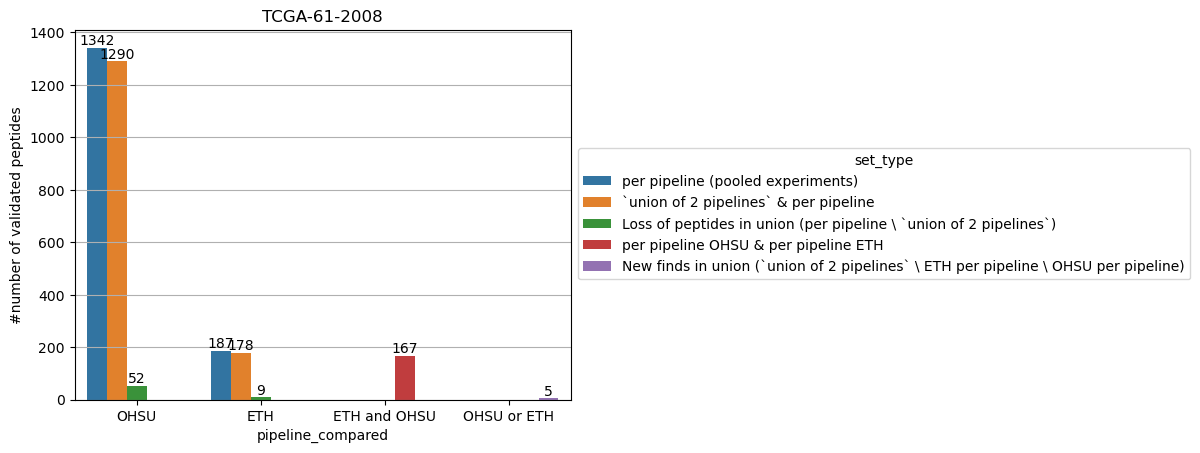

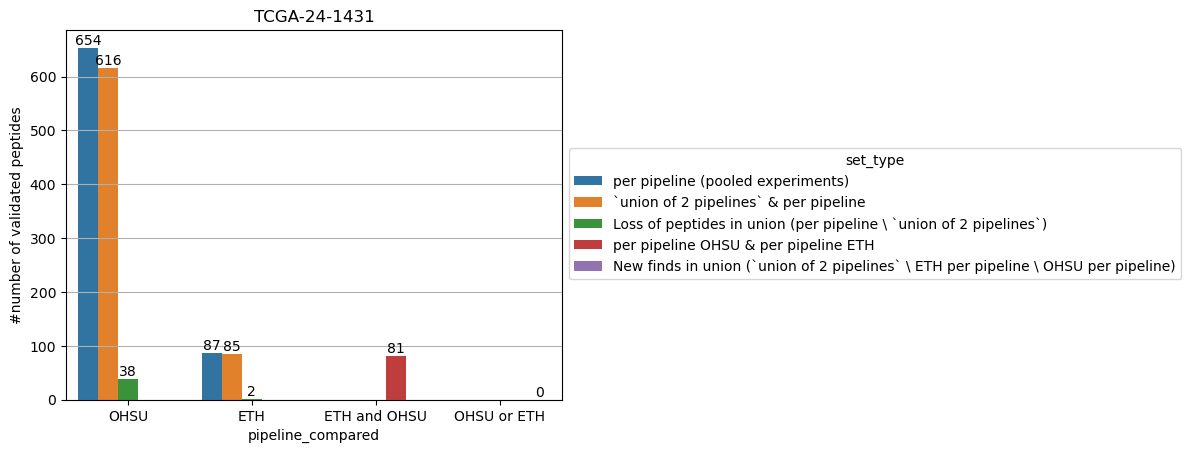

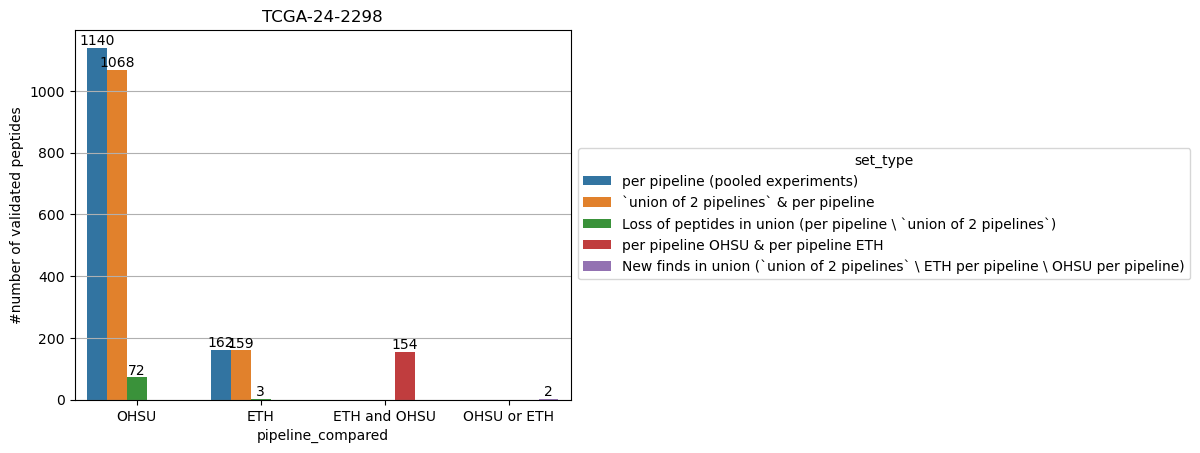

In [76]:
for sample in samples:
    df_plot = pd.DataFrame(prep_set)
    sample = '-'.join(sample.split('-')[0:3])
    
    df_plot = df_plot.loc[df_plot['sample'] == sample]
    plt.title(sample)
    plt.grid()

    ax = sns.barplot(df_plot, y = '#number of validated peptides', x = 'pipeline_compared', hue = 'set_type' )
    for i in ax.containers:
        ax.bar_label(i,)

    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, .7))
    plt.show()